# Librerias

In [1]:
## ejecutar por terminal o a medidad que avanza en el codigo. 
import pandas as pd
import numpy as np
from datetime import datetime
from unidecode import unidecode
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
pd.options.display.max_columns=None

ModuleNotFoundError: No module named 'unidecode'

# Cargar Datos

In [2]:
df1=pd.read_csv('D:\Pedro Miguel/Documents/MAESTRIA MIAD 2024/PRINCIPIOS DE M&S/DATOS/datos_clasificacion.txt',
            sep='\t',encoding='latin-1')
df1.head(3)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Pedro Miguel\AppData\Local\Temp\ipykernel_14392\179717942.py:1: SyntaxWarning: invalid escape sequence '\P'
  df1=pd.read_csv('D:\Pedro Miguel/Documents/MAESTRIA MIAD 2024/PRINCIPIOS DE M&S/DATOS/datos_clasificacion.txt',


,Edad,Ingresos,Gastos,Balance_Deuda,Puntaje_Credito,Numero_Productos,Historial_Incidentes,RegiÃ³n,Tipo_Empresa,Sector,Estado_Financiero
0,56,128541,57380,2921,403,2,0,Este,Mediana,Manufactura,0
1,69,178696,55400,38740,700,8,4,Sur,Mediana,TecnologÃ­a,1
2,46,134634,41258,3387,545,5,0,Norte,PequeÃ±a,Finanzas,0


# Ajustar nombre de las variables

In [3]:
df1.columns

Index(['Edad', 'Ingresos', 'Gastos', 'Balance_Deuda', 'Puntaje_Credito',
       'Numero_Productos', 'Historial_Incidentes', 'RegiÃ³n', 'Tipo_Empresa',
       'Sector', 'Estado_Financiero'],
      dtype='object')

In [4]:
df1_rename=df1.rename(columns={'RegiÃ³n':'Region'})
df1_rename.head(3)

,Edad,Ingresos,Gastos,Balance_Deuda,Puntaje_Credito,Numero_Productos,Historial_Incidentes,Region,Tipo_Empresa,Sector,Estado_Financiero
0,56,128541,57380,2921,403,2,0,Este,Mediana,Manufactura,0
1,69,178696,55400,38740,700,8,4,Sur,Mediana,TecnologÃ­a,1
2,46,134634,41258,3387,545,5,0,Norte,PequeÃ±a,Finanzas,0


# Explorar Datos

In [5]:
df1_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11374 entries, 0 to 11373
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Edad                  11374 non-null  int64 
 1   Ingresos              11374 non-null  int64 
 2   Gastos                11374 non-null  int64 
 3   Balance_Deuda         11374 non-null  int64 
 4   Puntaje_Credito       11374 non-null  int64 
 5   Numero_Productos      11374 non-null  int64 
 6   Historial_Incidentes  11374 non-null  int64 
 7   Region                11374 non-null  object
 8   Tipo_Empresa          11374 non-null  object
 9   Sector                11374 non-null  object
 10  Estado_Financiero     11374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 977.6+ KB


In [7]:
#Identificacion de valores nulos

nulos1=df1_rename.isnull().sum()
nulos1

Edad                    0
Ingresos                0
Gastos                  0
Balance_Deuda           0
Puntaje_Credito         0
Numero_Productos        0
Historial_Incidentes    0
Region                  0
Tipo_Empresa            0
Sector                  0
Estado_Financiero       0
dtype: int64

In [8]:
# Validación de filas duplicadas
num_filas_duplicadas=df1_rename.duplicated().sum()
print(f'La cantidad de duplicados en el conjunto de datos 1 es de {num_filas_duplicadas}')

La cantidad de duplicados en el conjunto de datos 1 es de 0


In [9]:
df1_rename.describe()

,Edad,Ingresos,Gastos,Balance_Deuda,Puntaje_Credito,Numero_Productos,Historial_Incidentes,Estado_Financiero
count,11374.000000,11374.000000,11374.000000,11374.000000,11374.000000,11374.000000,11374.000000,11374.000000
mean,43.488043,109356.763935,52401.407948,25309.559873,575.590997,5.008177,1.993054,0.503693
std,14.911079,52062.990058,27549.300244,14147.551508,158.294336,2.575002,1.413108,0.500008
min,18.000000,20005.000000,5014.000000,1001.000000,300.000000,1.000000,0.000000,0.000000
25%,31.000000,64221.250000,28109.000000,13061.250000,439.000000,3.000000,1.000000,0.000000
50%,43.000000,109531.000000,52681.000000,25125.500000,575.000000,5.000000,2.000000,1.000000
75%,56.000000,154326.000000,76493.750000,37612.000000,712.000000,7.000000,3.000000,1.000000
max,69.000000,199992.000000,99994.000000,49995.000000,849.000000,9.000000,4.000000,1.000000


In [12]:
#Agrupacion de datos

grupo=df1_rename.groupby(['Region','Tipo_Empresa','Sector']).size().reset_index(name='Cantidad')
grupo

,Region,Tipo_Empresa,Sector,Cantidad
0,Este,Grande,Finanzas,233
1,Este,Grande,Manufactura,226
2,Este,Grande,Salud,216
3,Este,Grande,TecnologÃ­a,241
4,Este,Mediana,Finanzas,240
5,Este,Mediana,Manufactura,214
6,Este,Mediana,Salud,252
7,Este,Mediana,TecnologÃ­a,219
8,Este,PequeÃ±a,Finanzas,231
9,Este,PequeÃ±a,Manufactura,231


In [14]:
# reemplazar valor mal escrito en el dataframe

df1_rename['Tipo_Empresa'] = df1_rename['Tipo_Empresa'].replace('PequeÃ±a', 'Pequeña')
df1_rename['Sector'] = df1_rename['Sector'].replace('TecnologÃ­a', 'Tecnologia')
df1_rename.head(3)

,Edad,Ingresos,Gastos,Balance_Deuda,Puntaje_Credito,Numero_Productos,Historial_Incidentes,Region,Tipo_Empresa,Sector,Estado_Financiero
0,56,128541,57380,2921,403,2,0,Este,Mediana,Manufactura,0
1,69,178696,55400,38740,700,8,4,Sur,Mediana,Tecnologia,1
2,46,134634,41258,3387,545,5,0,Norte,Pequeña,Finanzas,0


# Tratamiento de datos categóricos

Este código es para tomar las columnas categóricas  en el DataFrame df1_rename y las convierte en valores numéricos utilizando LabelEncoder. Esto es útil cuando se esta preparando datos categóricos para modelos de aprendizaje automático que solo pueden manejar valores numéricos.

In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df1_rename['Region']=lb.fit_transform(df1_rename['Region'].values)
df1_rename['Tipo_Empresa']=lb.fit_transform(df1_rename['Tipo_Empresa'].values)
df1_rename['Sector']=lb.fit_transform(df1_rename['Sector'].values)
df1_rename=df1_rename.astype(int)
df1_rename.head(5)

,Edad,Ingresos,Gastos,Balance_Deuda,Puntaje_Credito,Numero_Productos,Historial_Incidentes,Region,Tipo_Empresa,Sector,Estado_Financiero
0,56,128541,57380,2921,403,2,0,0,1,1,0
1,69,178696,55400,38740,700,8,4,3,1,3,1
2,46,134634,41258,3387,545,5,0,1,2,0,0
3,32,148701,86006,11730,491,6,4,0,0,1,0
4,60,77745,53957,15830,595,8,3,2,2,0,1


In [16]:
X = df1_rename.loc[:, ~df1_rename.columns.str.contains('Estado_Financiero')]
Y = df1_rename.loc[:, df1_rename.columns.str.contains('Estado_Financiero')]                                                     
print("Separación de datos usando Pandas") 

print(X.shape, Y.shape)

Separación de datos usando Pandas
(11374, 10) (11374, 1)


# Balanceo

In [18]:
import numpy as np
import seaborn as sns

<Axes: xlabel='Estado_Financiero', ylabel='count'>

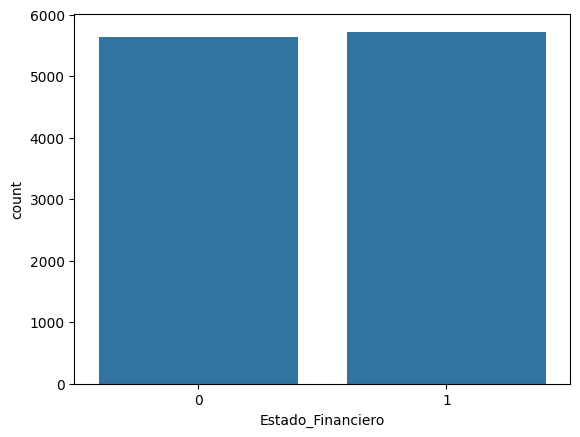

In [19]:
sns.countplot(data=df1_rename,x="Estado_Financiero")

In [20]:
frecuencias=Y['Estado_Financiero'].value_counts()
frecuencias

Estado_Financiero
1    5729
0    5645
Name: count, dtype: int64

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy='auto', random_state=42)
X,Y=rus.fit_resample(X,Y)
frecuencias=Y['Estado_Financiero'].value_counts()
frecuencias

Estado_Financiero
0    5645
1    5645
Name: count, dtype: int64

# Split Datos

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=42,stratify=Y)

# Estandarizacion

In [23]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [24]:
from sklearn.decomposition import PCA
pca=PCA()
X_train_vector=pca.fit_transform(X_train_std)

In [25]:
m_covarianza=np.cov(X_train_std.T)
eigen_valor, eigen_vector=np.linalg.eig(m_covarianza)

In [26]:
eigen_valor

array([0.93516409, 1.05411044, 1.04433191, 0.9647685 , 0.97347782,
       0.98996664, 0.98715165, 1.00995934, 1.01625411, 1.026081  ])

In [27]:
X_train_vector

array([[ 0.46760925, -0.11762206, -0.21131085, ...,  0.30894898,
         0.64104918, -0.80553822],
       [-1.20733506,  0.95123488,  1.51717697, ...,  1.62660995,
         0.10788889, -0.07597229],
       [ 0.54791976,  1.71443474, -0.03139248, ...,  0.90163834,
        -1.26614748,  0.41262552],
       ...,
       [ 0.60514627, -1.02973224,  1.01379518, ...,  0.53994353,
         1.46006771,  0.2748188 ],
       [-1.93985735, -1.89805479,  0.00544935, ..., -0.61326736,
         0.59091929, -0.08557539],
       [-0.09278076, -0.40760906,  0.10864197, ...,  0.91500737,
         1.434192  ,  0.46410977]])

In [28]:
X_train_vector_pd=pd.DataFrame(X_train_vector)
X_train_vector_pd

,0,1,2,3,4,5,6,7,8,9
0,0.467609,-0.117622,-0.211311,0.580589,0.552863,-0.260483,1.389122,0.308949,0.641049,-0.805538
1,-1.207335,0.951235,1.517177,0.584654,1.962191,0.314182,0.677020,1.626610,0.107889,-0.075972
2,0.547920,1.714435,-0.031392,1.830678,-0.423043,0.786261,0.572253,0.901638,-1.266147,0.412626
3,0.160802,-1.430999,-0.739303,-0.647408,-1.833180,0.245568,-0.319733,-0.418586,-0.847502,1.261411
4,0.348880,0.060244,0.822589,0.739777,-0.326207,1.728064,0.594975,1.025352,-1.138986,-0.834005
...,...,...,...,...,...,...,...,...,...,...
7898,0.158637,0.361470,-1.378105,0.093713,-0.023353,0.342583,-0.829679,-1.860573,0.188858,1.675607
7899,-0.806654,0.722620,-0.663518,-0.860990,-1.088035,2.436951,-1.019658,-0.347745,-0.408739,1.328991
7900,0.605146,-1.029732,1.013795,-0.329445,0.084566,-0.799409,0.113545,0.539944,1.460068,0.274819
7901,-1.939857,-1.898055,0.005449,0.153257,0.360811,-0.608403,0.156262,-0.613267,0.590919,-0.085575


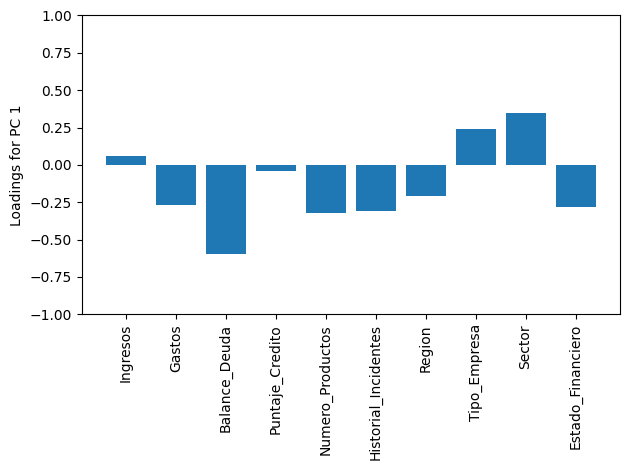

In [29]:
import matplotlib.pyplot as plt
valores=eigen_vector*np.sqrt(eigen_valor)

fig, ax = plt.subplots()

ax.bar(range(10), valores[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(10))
ax.set_xticklabels(df1_rename.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [30]:
X_train_std_df=pd.DataFrame(X_train_std)
X_train_std_df

,0,1,2,3,4,5,6,7,8,9
0,0.296435,0.337051,-0.487163,-0.460982,-0.571627,0.773511,-0.707626,1.339095,-0.010958,-0.449740
1,1.499476,0.502144,-0.509937,-0.600581,1.043512,1.551749,1.419288,0.442242,1.208740,-1.336983
2,0.563777,0.724204,-0.015368,1.369576,1.352660,-0.393846,0.710317,1.339095,-1.230655,-1.336983
3,-1.508127,0.058928,1.025056,0.009487,-0.603173,-1.172083,0.710317,-0.454611,-1.230655,1.324746
4,0.764284,0.249254,0.078889,0.250234,-0.394971,-1.172083,1.419288,1.339095,-0.010958,-1.336983
...,...,...,...,...,...,...,...,...,...,...
7898,0.162763,-0.029715,0.830767,1.645806,-0.066896,0.384392,-0.707626,-1.351465,-1.230655,1.324746
7899,1.432640,0.040964,0.518138,0.808421,0.217015,-1.561202,1.419288,-1.351465,-1.230655,1.324746
7900,-0.371922,0.355649,1.029778,-1.377038,0.052977,0.384392,-0.707626,0.442242,1.208740,0.437503
7901,-0.973442,0.539725,-0.751337,-0.203058,-1.234087,1.162630,0.710317,-0.454611,1.208740,1.324746


In [31]:
X_train_std_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,7.903000e+03,7.903000e+03,7.903000e+03,7.903000e+03,7.903000e+03,7.903000e+03,7.903000e+03,7.903000e+03,7.903000e+03,7.903000e+03
mean,1.798160e-18,1.708252e-17,-2.697239e-17,1.213758e-16,-1.897058e-16,-4.135767e-17,-2.877055e-17,-6.113742e-17,-8.631166e-17,-4.180721e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-1.708634e+00,-1.714034e+00,-1.726672e+00,-1.719287e+00,-1.732509e+00,-1.561202e+00,-1.416597e+00,-1.351465e+00,-1.230655e+00,-1.336983e+00
25%,-8.397709e-01,-8.699609e-01,-8.770678e-01,-8.696375e-01,-8.744661e-01,-7.829644e-01,-7.076257e-01,-4.546115e-01,-1.230655e+00,-1.336983e+00
50%,-3.774356e-02,1.152900e-03,5.335512e-03,-1.383887e-02,2.504337e-03,-4.726737e-03,1.345637e-03,-4.546115e-01,-1.095768e-02,4.375031e-01
75%,8.979550e-01,8.573133e-01,8.803472e-01,8.685014e-01,8.542382e-01,7.735109e-01,7.103170e-01,1.339095e+00,1.208740e+00,1.324746e+00
max,1.699982e+00,1.746900e+00,1.723250e+00,1.742360e+00,1.731209e+00,1.551749e+00,1.419288e+00,1.339095e+00,1.208740e+00,1.324746e+00


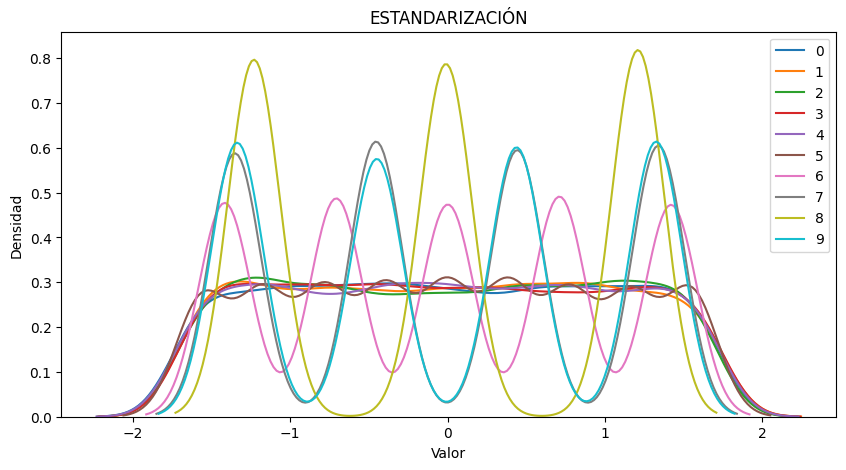

In [33]:
columnas_seleccionadas = X_train_std_df.get('columnas', [])
fig3, ax = plt.subplots(figsize=(10, 5))
for columna in X_train_std_df.columns:
    sns.kdeplot(X_train_std_df[columna], ax=ax, label=columna)
ax.set_title('ESTANDARIZACIÓN')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

Estandarizacion robusta

In [36]:
from sklearn.preprocessing import RobustScaler
robustsc = RobustScaler()
X_train_robust = robustsc.fit_transform(X_train)
X_test_robust = robustsc.transform(X_test)

In [37]:
X_train_rostd_df=pd.DataFrame(X_train_robust)
X_train_rostd_df

,0,1,2,3,4,5,6,7,8,9
0,0.192308,0.194467,-0.280240,-0.257254,-0.332117,0.50,-0.5,1.0,0.0,-0.333333
1,0.884615,0.290047,-0.293199,-0.337569,0.602190,1.00,1.0,0.5,0.5,-0.666667
2,0.346154,0.418608,-0.011781,0.795917,0.781022,-0.25,0.5,1.0,-0.5,-0.666667
3,-0.846154,0.033449,0.580239,0.013420,-0.350365,-0.75,0.5,0.0,-0.5,0.333333
4,0.461538,0.143637,0.041853,0.151929,-0.229927,-0.75,1.0,1.0,0.0,-0.666667
...,...,...,...,...,...,...,...,...,...,...
7898,0.115385,-0.017871,0.469685,0.954840,-0.040146,0.25,-0.5,-0.5,-0.5,0.333333
7899,0.846154,0.023049,0.291794,0.473069,0.124088,-1.00,1.0,-0.5,-0.5,0.333333
7900,-0.192308,0.205234,0.582926,-0.784287,0.029197,0.25,-0.5,0.5,0.5,0.000000
7901,-0.538462,0.311804,-0.430560,-0.108863,-0.715328,0.75,0.5,0.0,0.5,0.333333


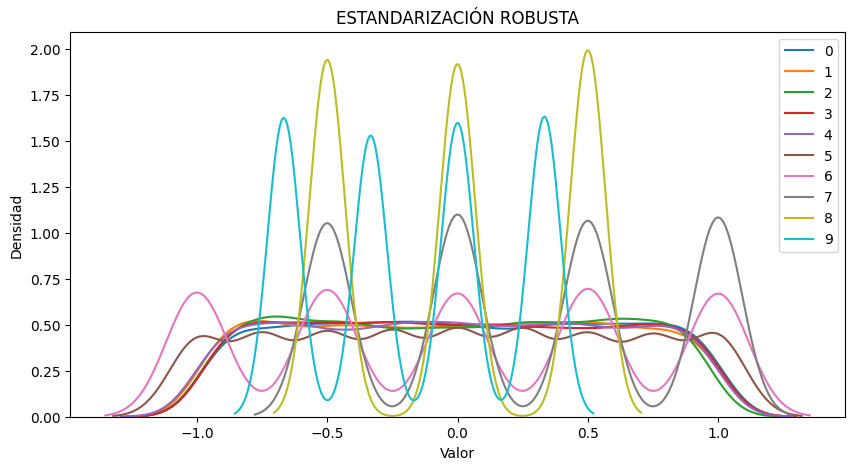

In [38]:
columnas_seleccionadas = X_train_rostd_df.get('columnas', [])
fig3, ax = plt.subplots(figsize=(10, 5))
for columna in X_train_rostd_df.columns:
    sns.kdeplot(X_train_rostd_df[columna], ax=ax, label=columna)
ax.set_title('ESTANDARIZACIÓN ROBUSTA')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

In [39]:
#### iniciamos con los modelos de prediccion
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=200, solver='liblinear')

Accuracy: 50.77%
Accuracy: 48.69%


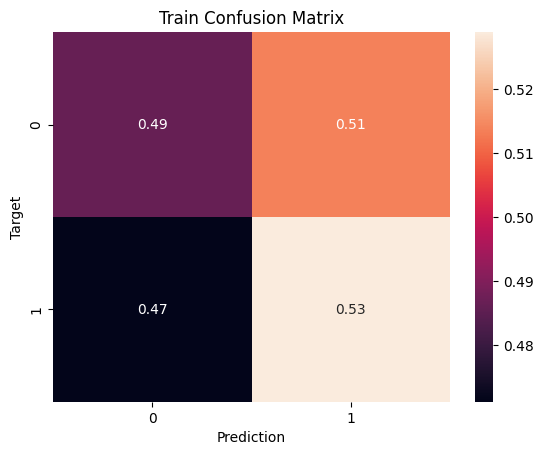

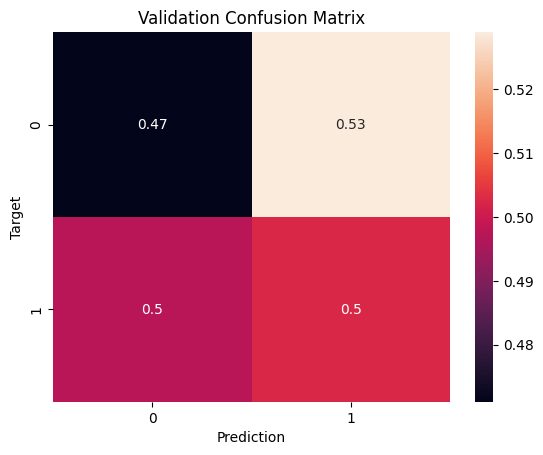

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    return preds

# Predecir y trazar sobre los datos de entrenamiento.
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predecir y trazar sobre los datos de validación.
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')

# Ramdom foresr

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
model_2.score(X_train,y_train)

1.0

Accuracy: 100.00%
Accuracy: 49.13%


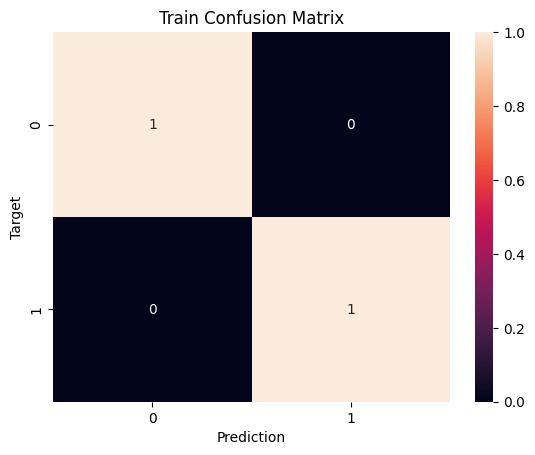

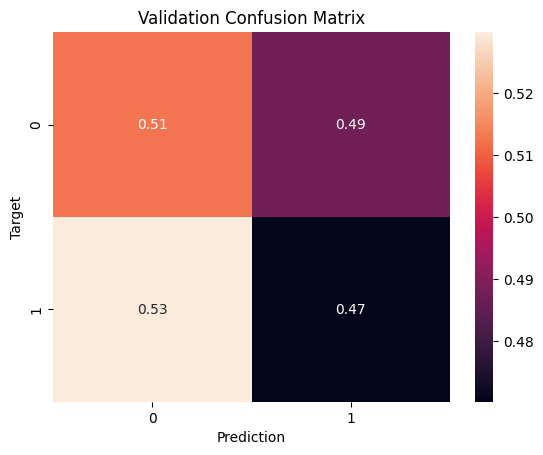

In [43]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))

    return preds

train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predecir y trazar sobre los datos de validación
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [10, 20, 30],  # Ajustar numero de arboles en el bosque
    'max_depth': [10, 20, 30],  # Ajustar la profundidaed maxima de cada arbol
    'min_samples_split': [2, 5, 10, 15, 20],  # Ajustar las muestras minimas para dividir el nodo
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Ajustar las muestaras minimas en nodo hoja
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

#Evaluar el modelo sobre los datos de entrenamiento y validación.
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Imprimir los resulatdos
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# salida del ajuste del hiperparametro 
#Training Accuracy: 0.9406554472984943
#Validation Accuracy: 0.487599645704163

# eliminando las variables dumi ya se empiezan a ver mejores resultados en los modelos 
########################################
#Training Accuracy: 0.8026066050866759
#Validation Accuracy: 0.49099498080897547

c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy: 0.8026066050866759
Validation Accuracy: 0.49099498080897547


# Árbol de decisión 

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

train_accuracy = decision_tree_model.score(X_train, y_train)
val_accuracy = decision_tree_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

#Training Accuracy: 1.0
#Validation Accuracy: 0.49379982285208146

Training Accuracy: 1.0
Validation Accuracy: 0.5045763212282256


# Ajuste de hiperparámetros del árbol de decisión

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
# salida del ajuste hper parametro
#Training Accuracy: 0.7446855624446412
#Validation Accuracy: 0.4977856510186005

c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Accuracy: 0.6510186005314438
Validation Accuracy: 0.503985828166519


# Modelo clasificador KNeighbors

c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training Accuracy: 0.687223206377325
Validation Accuracy: 0.4933569530558016


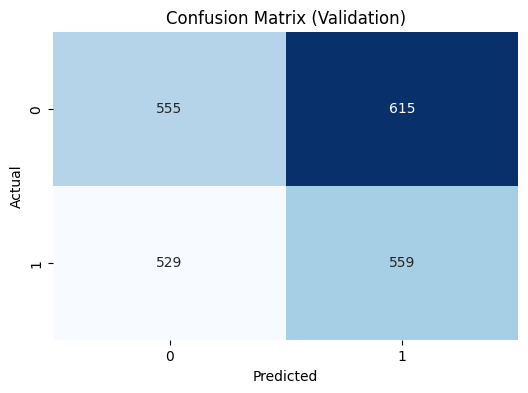

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)

y_val_pred = knn_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

confusion = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

# Ajuste de hiperparámetros de KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]  # Ajustar el número de vecinos para explorar
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)

y_val_pred = best_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy with Best Hyperparameters:", train_accuracy)
print("Validation Accuracy with Best Hyperparameters:", val_accuracy)

c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighb

Training Accuracy with Best Hyperparameters: 1.0
Validation Accuracy with Best Hyperparameters: 0.48804251550044286


c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.5064216120460585
Validation Accuracy: 0.5110717449069974


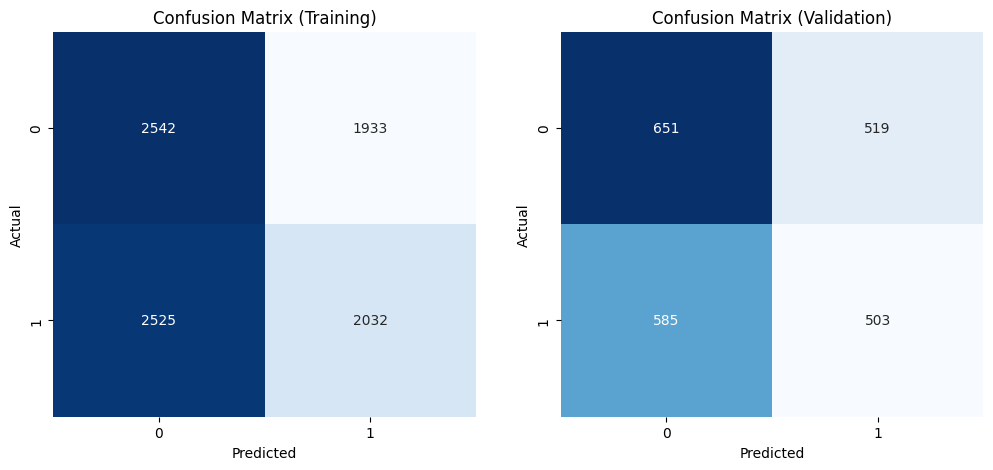

In [49]:
from sklearn.svm import SVC
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)

y_val_pred = svm_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

train_confusion = confusion_matrix(y_train, y_train_pred)
val_confusion = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()
#  tiempo de ejecución 23.41 min
#Training Accuracy: 0.4977856510186005
#Validation Accuracy: 0.521257750221435


### tiempo de ejecucuin 20.33
#######################################
#Training Accuracy: 0.5064216120460585
#Validation Accuracy: 0.5110717449069974

# Clasificador AdaBoost

c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Training Accuracy: 0.5518157661647476
AdaBoost Validation Accuracy: 0.49025686448184236


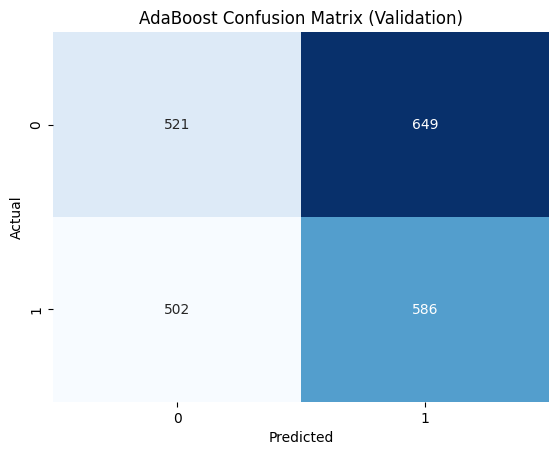

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_model.fit(X_train, y_train)

y_train_pred_adaboost = adaboost_model.predict(X_train)

y_val_pred_adaboost = adaboost_model.predict(X_val)

train_accuracy_adaboost = accuracy_score(y_train, y_train_pred_adaboost)

val_accuracy_adaboost = accuracy_score(y_val, y_val_pred_adaboost)

print("AdaBoost Training Accuracy:", train_accuracy_adaboost)
print("AdaBoost Validation Accuracy:", val_accuracy_adaboost)

confusion_adaboost = confusion_matrix(y_val, y_val_pred_adaboost)

# grafica la matrix de confusión
plt.figure()
sns.heatmap(confusion_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost Confusion Matrix (Validation)')
plt.show()

# Clasificador de aumento de gradiente

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear un clasificador de aumento de gradiente
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Ajustar el modelo GBM a los datos de entrenamiento
gbm_model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de entrenamiento.
y_train_pred_gbm = gbm_model.predict(X_train)

# Hacer predicciones sobre los datos de validación.
y_val_pred_gbm = gbm_model.predict(X_val)

# Calcular la precisión del entrenamiento
train_accuracy_gbm = accuracy_score(y_train, y_train_pred_gbm)

# Calcular la precisión de la validación
val_accuracy_gbm = accuracy_score(y_val, y_val_pred_gbm)

# Imprimir las precisiones de entrenamiento y validación.
print("GBM Training Accuracy:", train_accuracy_gbm)
print("GBM Validation Accuracy:", val_accuracy_gbm)

c:\Users\Pedro Miguel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM Training Accuracy: 0.6331930912311781
GBM Validation Accuracy: 0.4849424269264836


 # Clasificador xgboost

In [52]:
from xgboost import XGBClassifier

In [54]:
from xgboost import XGBClassifier

# Crear un clasificador XGBoost
xgboost_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)

# Ajustar el modelo XGBoost a los datos de entrenamiento
xgboost_model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de entrenamiento.
y_train_pred_xgboost = xgboost_model.predict(X_train)

# Hacer predicciones sobre los datos de validación.
y_val_pred_xgboost = xgboost_model.predict(X_val)

# Calcular la precisión del entrenamiento.
train_accuracy_xgboost = accuracy_score(y_train, y_train_pred_xgboost)

# Calcular la precisión de la validación.
val_accuracy_xgboost = accuracy_score(y_val, y_val_pred_xgboost)

# Imprimir las precisiones de entrenamiento y validación.
print("XGBoost Training Accuracy:", train_accuracy_xgboost)
print("XGBoost Validation Accuracy:", val_accuracy_xgboost)

XGBoost Training Accuracy: 0.6793622674933569
XGBoost Validation Accuracy: 0.48848538529672275


# Elección del modelo 

# Logistic Regression  
el acuracy para este modelo en prueba y validacion es cercano lo que indica que no hay overfiting sin embargo, su eficiencia en la prediccion es apenas de alrededor del 50%

Accuracy: 50.77%

Accuracy: 48.69%

# RandomForestClassifier
En este modelo se observa sobre ajuste, el modelo con los datos de test es capas de predecir el 100% pero antes datos nuevos solo puede explicar una variacion de alrededor del 50% 

Accuracy: 100.00%

Accuracy: 49.13%

# Ajuste de hiperparametro RandomForestClassi
ajustando hiperparametros para el modelo se observa una mejor respuesta del modelo si embargo, consideramos que todavia el modelo esta sobreajustado, debido a que la diferencia entre los acuracy para test y validacion sigue siendo significativa, 

Training Accuracy: 0.8026066050866759

Validation Accuracy: 0.49099498080897547

# Árbol de decisión 
modelo con sobreajuste 

Training Accuracy: 1.0

Validation Accuracy: 0.49379982285208146

# Salida del ajuste hiper parametro Árbol de decisón 
se evidencia una mejora significativa en el acuracy de test al ser más cercano al acuracy de validación, es uno de los modelos que consideramos, que ya no tiene sobre ajuste y clasifica entre nuestros mejores modelos para predecir. 

Training Accuracy: 0.7446855624446412

Validation Accuracy: 0.4977856510186005


# KNeighborsClassifier
El acuracy de test al ser más cercano al acuracy de validación, es uno de los modelos que consideramos, que ya no tiene sobre ajuste y clasifica entre nuestros mejores modelos para predecir.

Training Accuracy: 0.687223206377325

Validation Accuracy: 0.4933569530558016

# Hiper parametro KNeighborsClassifier
modelo con sobre ajuste.

Training Accuracy with Best Hyperparameters: 1.0

Validation Accuracy with Best Hyperparameters: 0.48804251550044286

# AdaBoost classifier
modelo con bajo rendimiento para predecir, no se observa sobre ajuste o  underfiting 

Training Accuracy: 0.5518157661647476

Validation Accuracy: 0.49025686448184236

# GBM Validation classifier
El acuracy de test al ser más cercano al acuracy de validación, es uno de los modelos que consideramos, ya no tiene sobre ajuste y clasifica entre  uno de nuestros mejores modelos para predecir.

Accuracy: 0.6331930912311781

Accuracy: 0.4849424269264836

# XGBoost classsifier
El acuracy de test al ser más cercano al acuracy de validación, es uno de los modelos que consideramos, ya no tiene sobre ajuste y clasifica entre  uno de nuestros mejores modelos para predecir.

Training Accuracy: 0.6793622674933569

Validation Accuracy: 0.48848538529672275

Tomando en cuenta que un modelo sobre ajustado no es adecuado para predecir, y un modelo con un bajo poder predictivo, 
tampoco es ideal para nuestros intereses, escogimos el modelo **ajuste hiper parametro Árbol de decisón**, debido a que consideramos que no es un modelo sobre ajustado y posee el valor mas alto para la prediccion en los datos de validación. 